In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (10, 8)})

call_data = pd.read_csv('../data/Call_Data.csv')
call_data.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Blurred_Longitude,Blurred_Latitude
0,2010000369640,ASSISTANCE RENDERED,ONVIEW,7.0,SUSPICIOUS STOP - OFFICER INITIATED ONVIEW,--SUSPICIOUS CIRCUM. - SUSPICIOUS VEHICLE,10/22/2010 03:24:56 PM,10/22/2010 03:24:56 PM,SOUTH,ROBERT,R1,-122.317589,47.559422
1,2012000444403,ASSISTANCE RENDERED,911,1.0,DIST - IP/JO - DV DIST - NO ASLT,"--DV - ARGUMENTS, DISTURBANCE (NO ARREST)",12/30/2012 03:04:14 PM,12/30/2012 03:39:08 PM,SOUTH,SAM,S1,-122.291454,47.532386
2,2010000091968,NO POLICE ACTION POSSIBLE OR NECESSARY,ONVIEW,7.0,TRAFFIC STOP - OFFICER INITIATED ONVIEW,--TRAFFIC - MOVING VIOLATION,03/20/2010 01:16:08 PM,03/20/2010 01:16:08 PM,SOUTH,SAM,S1,-122.303477,47.542854
3,2015000221085,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3.0,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",--ALARM-RESIDENTIAL BURG,06/30/2015 10:29:43 AM,06/30/2015 12:17:11 PM,SOUTH,ROBERT,R1,-122.308633,47.559024
4,2011000257876,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",3.0,TRAFFIC - MOVING VIOLATION,--TRAFFIC - MOVING VIOLATION,08/07/2011 12:52:06 PM,NaN,SOUTH,ROBERT,R2,-122.293512,47.560821


In [2]:
call_data.size

71184776

In [3]:
call_data.shape

(5475752, 13)

In [4]:
call_data.dtypes

CAD Event Number                 int64
Event Clearance Description     object
Call Type                       object
Priority                       float64
Initial Call Type               object
Final Call Type                 object
Original Time Queued            object
Arrived Time                    object
Precinct                        object
Sector                          object
Beat                            object
Blurred_Longitude              float64
Blurred_Latitude               float64
dtype: object

In [5]:
print(df.columns)

Index(['CAD Event Number', 'Event Clearance Description', 'Call Type',
       'Priority', 'Initial Call Type', 'Final Call Type',
       'Original Time Queued', 'Arrived Time', 'Precinct', 'Sector', 'Beat',
       'Blurred_Longitude', 'Blurred_Latitude'],
      dtype='object')


In [12]:
import pandas as pd

# Calculate statistical measures
response_time_stats = df['Response Time'].describe()

# Print the statistics
print(response_time_stats)

count    5.010246e+06
mean     1.673169e+03
std      1.380728e+04
min     -8.630400e+04
25%      0.000000e+00
50%      2.680000e+02
75%      1.320000e+03
max      2.374770e+07
Name: Response Time, dtype: float64


In [13]:
# Convert response times to minutes
df['Response Time Minutes'] = df['Response Time'] / 60

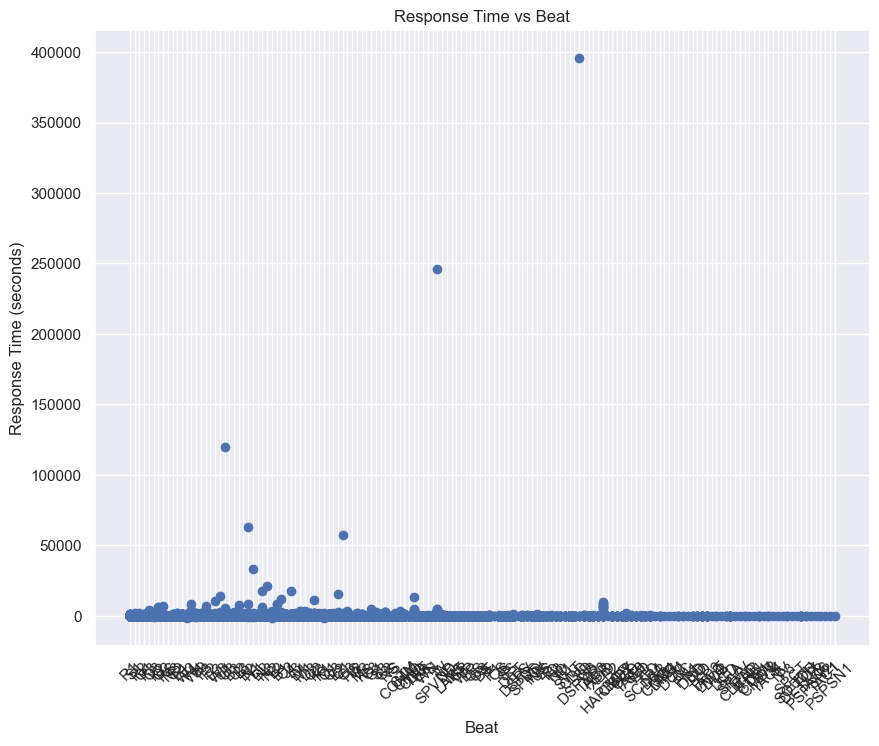

In [14]:
# Scatter plot
plt.scatter(df['Beat'], df['Response Time Minutes'])

# Set labels and title
plt.xlabel('Beat')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time vs Beat')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

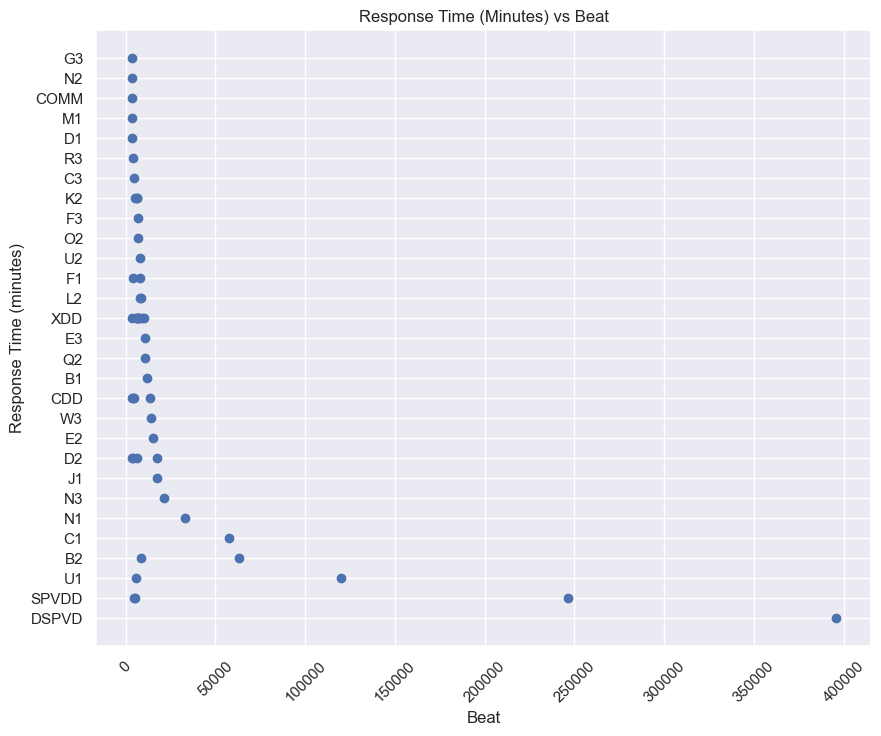

In [15]:
# Sort DataFrame by Response Time Minutes in descending order
sorted_df = df.sort_values(by='Response Time Minutes', ascending=False)

# Get the first 50 data points
limited_df = sorted_df.head(50)

# Scatter plot
plt.scatter(limited_df['Response Time Minutes'], limited_df['Beat'])

# Set labels and title
plt.xlabel('Beat')
plt.ylabel('Response Time (minutes)')
plt.title('Response Time (Minutes) vs Beat')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [16]:
!pip install geopandas

You should consider upgrading via the '/Users/paulin/Documents/GitHub/city-insights-analysis/venv/bin/python -m pip install --upgrade pip' command.


In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Step 1: Extract geometries from KMZ file
beats = gpd.read_file('../data/SPD_Beats_WGS84.kmz')

# Step 2: Ensure compatibility between datasets
# Assuming you have a "Beat" column in your dataset, use it as the common field
merged_data = beats.merge(your_dataset, on='Beat')

# Step 3: Create choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(column='Data_Column_to_Visualize', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Step 4: Customize and display the map
ax.set_title('Choropleth Map of Data')
ax.axis('off')
plt.show()


ModuleNotFoundError: No module named 'geopandas'